***

**Hi, Welcome to my analysis :)**

This dataset is collected from amazon website and data is about the phones that are available amazon website data

The dataset has total **369 rows** and **8 columns**

**The Features**
1. phone_name
2. Unnamed 1 (dummy column) 
3. Brand
4. rating out of five
5. discount in percentage
6. real price of phone
7. Phones discounted price
8. rated by people(how many people rated this phones)


***
**Steps**
1. Import Dataset
2. Understand the Data
3. Preprocessing
4. Exploratory Data Analysis

***
**Asked Questions**

* Which brands are most upvoted and least upvoted.
* Which brands is the most famous one ( more total number of ratings).
* Check if there is a relation between price of a product and its ratings.
* Check the offered phone types and it's prices by Brands.
* Check the market share of Brands by it's offered products.
***


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phonesonamazon/amazon 1.xlsx


In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.4 MB/s eta 0:00:00


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import Dataset

In [4]:
df = pd.read_excel("/kaggle/input/phonesonamazon/amazon 1.xlsx")
df

,phone_name,Unnamed: 1,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",NaN,Samsung,4.4,"17,194","39,990",74999.0,47.0
1,"Samsung Galaxy M32 (Light Blue, 4GB RAM, 64GB ...",NaN,Samsung,4.1,"44,417","14,999",16999.0,12.0
2,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",NaN,Redmi,4.2,"178,833","6,999",8499.0,18.0
3,"I KALL Z4 Smartphone (5.5 Inch Display, 4GB, 3...",NaN,I Kall,NaN,NaN,"4,999",6499.0,23.0
4,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",NaN,Redmi,4.2,"178,833","6,999",7999.0,13.0
...,...,...,...,...,...,...,...,...
360,"iQOO vivo Z6 Pro 5G (Phantom Dusk, 12GB RAM, 2...",NaN,iQOO,4.2,"3,291","28,999",33990.0,15.0
361,"realme narzo 30 5G (Racing Blue, 6GB RAM, 128G...",NaN,realme,4.2,"2,186","16,999",17999.0,6.0
362,"Xiaomi 11i 5G (Purple Mist, 6GB RAM, 128GB Sto...",NaN,Xiaomi,3.7,22,"22,990",29999.0,23.0
363,"(Renewed) Nokia 6.1 Plus TA-1083 DS (Blue, 64GB)",NaN,(Renewed,3.4,133,"16,999",18599.0,8.0


# 2. Understand the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_name              365 non-null    object 
 1   Unnamed: 1              0 non-null      float64
 2   Brand                   365 non-null    object 
 3   ratting_out_of_five     334 non-null    float64
 4   Rated_people            337 non-null    object 
 5   Offered_price_in_rupee  352 non-null    object 
 6   real_rice_in_rupee      342 non-null    float64
 7   Percent_off             342 non-null    float64
dtypes: float64(4), object(4)
memory usage: 22.9+ KB


In [6]:
df.describe(include="all")

,phone_name,Unnamed: 1,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
count,365,0.0,365,334.000000,337,352,342.000000,342.000000
unique,321,NaN,50,NaN,128,135,NaN,NaN
top,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",NaN,Samsung,NaN,2,"6,999",NaN,NaN
freq,2,NaN,63,NaN,28,17,NaN,NaN
mean,NaN,NaN,NaN,3.885928,NaN,NaN,18079.730994,22.315789
std,NaN,NaN,NaN,0.627220,NaN,NaN,13747.094069,9.850182
min,NaN,NaN,NaN,1.000000,NaN,NaN,1399.000000,6.000000
25%,NaN,NaN,NaN,3.700000,NaN,NaN,9999.000000,15.000000
50%,NaN,NaN,NaN,4.100000,NaN,NaN,14999.000000,21.000000
75%,NaN,NaN,NaN,4.200000,NaN,NaN,20990.000000,27.750000


#  3. Preprocessing

### 3.1. Preprocessing for Brands and Phone_name

In [7]:
## Make capital letters all phone_names and brands
# So that we do not have duplicates with capital and lowercase letters.
df.loc[:,["phone_name","Brand"]]=df.loc[:,["phone_name","Brand"]].apply(lambda x : x.str.upper())

In [8]:
# There are some brand "Renewed". These are not true. We should handle them.
df[df.phone_name.str.contains("Renewed")]

,phone_name,Unnamed: 1,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off


In [9]:
# Drop Renewed word from Phone Name
df["phone_name"]=df["phone_name"].apply(lambda x: x.replace("(RENEWED) ",""))
df[df.phone_name.str.contains("RENEWED")]

# Drop Renewed word from Brand
df["Brand"]=df["Brand"].apply(lambda x: x.replace("(RENEWED) ",""))
df["Brand"]=df["Brand"].apply(lambda x: x.replace("(RENEWED",""))

df[df.Brand.str.contains("RENEWED")]

,phone_name,Unnamed: 1,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off


In [10]:
#We deleted Renewed Brand Names, Now they are ""
# We should replace Brand Names by getting brand info from phone_name
df.loc[df.Brand=="","Brand"]=df[df.Brand==""].phone_name.str.split(" ").str[0]

In [11]:
df.Brand.value_counts()
# We should delete second words because there are cases like Realme and Realme C , Tecno and Tecno Spark
# First words will be enough.

SAMSUNG         66
REDMI           61
I KALL          46
NOKIA           37
REALME          21
TECNO           19
OPPO            15
IQOO            14
ONEPLUS         13
VIVO            10
LAVA             8
MOTOROLA         6
JIO              6
XIAOMI           4
ITEL             4
NUVECK           3
POCO             3
APPLE            3
BB               3
MICROMAX         3
MI               2
REALME C         2
INFINIX          2
ALCATEL          1
GT               1
KECHAODA         1
K460             1
APPIE            1
NILLKIN          1
GOOGLE           1
MOTO             1
DO               1
PANASONIC        1
SHIVANSH         1
TECNO SPARK      1
SHIVANSH LYF     1
INDIA            1
Name: Brand, dtype: int64

In [12]:
df["Brand"]=df["Brand"].apply(lambda x: x.replace("TECNO SPARK","TECNO"))
df["Brand"]=df["Brand"].apply(lambda x: x.replace("REALME C","REALME"))
df["Brand"]=df["Brand"].apply(lambda x: x.replace("SHIVANSH LYF","SHIVANSH"))

In [13]:
### WE should seperate properties into a new column. I will check it out how to do that in well shape.
df.phone_name

0      SAMSUNG GALAXY S20 FE 5G (CLOUD NAVY, 8GB RAM,...
1      SAMSUNG GALAXY M32 (LIGHT BLUE, 4GB RAM, 64GB ...
2      REDMI 9A SPORT (CORAL GREEN, 2GB RAM, 32GB STO...
3      I KALL Z4 SMARTPHONE (5.5 INCH DISPLAY, 4GB, 3...
4      REDMI 9A SPORT (CARBON BLACK, 2GB RAM, 32GB ST...
                             ...                        
360    IQOO VIVO Z6 PRO 5G (PHANTOM DUSK, 12GB RAM, 2...
361    REALME NARZO 30 5G (RACING BLUE, 6GB RAM, 128G...
362    XIAOMI 11I 5G (PURPLE MIST, 6GB RAM, 128GB STO...
363               NOKIA 6.1 PLUS TA-1083 DS (BLUE, 64GB)
364    NOKIA G21 ANDROID SMARTPHONE, DUAL SIM, 3-DAY ...
Name: phone_name, Length: 365, dtype: object

In [14]:
# Drop unnecessary columns "Unnamed: 1"
df.drop(labels="Unnamed: 1",axis=1,inplace=True)

In [15]:
df.head(3)

,phone_name,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
0,"SAMSUNG GALAXY S20 FE 5G (CLOUD NAVY, 8GB RAM,...",SAMSUNG,4.4,"17,194","39,990",74999.0,47.0
1,"SAMSUNG GALAXY M32 (LIGHT BLUE, 4GB RAM, 64GB ...",SAMSUNG,4.1,"44,417","14,999",16999.0,12.0
2,"REDMI 9A SPORT (CORAL GREEN, 2GB RAM, 32GB STO...",REDMI,4.2,"178,833","6,999",8499.0,18.0


### 3.2. Preprocessing for ratting_out_of_five and rated_people

In [16]:
# impute rating of phones by their brand average.
df['ratting_out_of_five']=df.groupby('Brand')['ratting_out_of_five'].apply(lambda x:x.fillna(x.mean()))

In [17]:
# after dealing with missing values, there are still some missing values
# we can drop them.
df.loc[df['ratting_out_of_five'].isnull(),:]

,phone_name,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
41,"SHIVANSH LYF C451 (, 8 GB) (1 GB RAM) COLOR AS...",SHIVANSH,NaN,NaN,"3,350",8990.0,63.0
58,"NUVECK KARBONN AURA POWER 4G+ (CHAMPAGNE, 8 GB...",NUVECK,NaN,NaN,"3,600",7999.0,55.0
195,BB Z10 COMPATIBLE WITH BLACKBERRY WITH 8 MP CA...,BB,NaN,NaN,"6,599",12999.0,49.0
212,BB BOLD 9780 COMPATIBLE WITH BLACKBERRY WITH 5...,BB,NaN,NaN,"6,299",12999.0,52.0
224,SHIVANSH MICROMAX CANVAS TABBY P469 FAMILY TAB...,SHIVANSH,NaN,NaN,"3,490",5990.0,42.0
242,"INFINIX HOT 11 2022 (AURORA GREEN, 4GB RAM 64G...",INFINIX,NaN,NaN,"9,799",12999.0,25.0
267,"NUVECK GIONEE A1 LITE (BLACK, 32 GB) (3 GB RAM)",NUVECK,NaN,Only 2 left in stock.,"6,440",6839.0,6.0
289,"NILLKIN CASE FOR XIAOMI POCO M4 PRO 4G (6.43"" ...",NILLKIN,NaN,NaN,"1,599",1999.0,20.0
291,"APPIE LPHONE 5S (SPACE GREY, 16GB)",APPIE,NaN,NaN,"13,599",24999.0,46.0
292,BB BOLD 9700 COMPATIBLE WITH BLACKBERRY WITH 3...,BB,NaN,Only 2 left in stock.,"6,299",12999.0,52.0


In [18]:
# drop null values from ratting_out_of_five and Rated_people columns
df.dropna(axis=0,subset=["ratting_out_of_five","Rated_people"],inplace=True)

In [19]:
# drop commas, drop wrong entry "Save ₹1500" and change dtype to int
df.loc[:,"Rated_people"]=df.loc[:,"Rated_people"].apply(lambda x: x.replace(",",""))
df = df[df["Rated_people"] != "Save ₹1500"]
df["Rated_people"]=df["Rated_people"].astype("int")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
df

,phone_name,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
0,"SAMSUNG GALAXY S20 FE 5G (CLOUD NAVY, 8GB RAM,...",SAMSUNG,4.4,17194,"39,990",74999.0,47.0
1,"SAMSUNG GALAXY M32 (LIGHT BLUE, 4GB RAM, 64GB ...",SAMSUNG,4.1,44417,"14,999",16999.0,12.0
2,"REDMI 9A SPORT (CORAL GREEN, 2GB RAM, 32GB STO...",REDMI,4.2,178833,"6,999",8499.0,18.0
4,"REDMI 9A SPORT (CARBON BLACK, 2GB RAM, 32GB ST...",REDMI,4.2,178833,"6,999",7999.0,13.0
5,"JIO NEXT 32 GB ROM, 2 GB RAM, BLUE SMARTPHONE",JIO,3.6,1071,"4,500",7299.0,38.0
...,...,...,...,...,...,...,...
360,"IQOO VIVO Z6 PRO 5G (PHANTOM DUSK, 12GB RAM, 2...",IQOO,4.2,3291,"28,999",33990.0,15.0
361,"REALME NARZO 30 5G (RACING BLUE, 6GB RAM, 128G...",REALME,4.2,2186,"16,999",17999.0,6.0
362,"XIAOMI 11I 5G (PURPLE MIST, 6GB RAM, 128GB STO...",XIAOMI,3.7,22,"22,990",29999.0,23.0
363,"NOKIA 6.1 PLUS TA-1083 DS (BLUE, 64GB)",NOKIA,3.4,133,"16,999",18599.0,8.0


### 3.3. Preprocessing for offered_price, real_price and percent off

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_name              334 non-null    object 
 1   Brand                   334 non-null    object 
 2   ratting_out_of_five     334 non-null    float64
 3   Rated_people            334 non-null    int64  
 4   Offered_price_in_rupee  324 non-null    object 
 5   real_rice_in_rupee      315 non-null    float64
 6   Percent_off             315 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.9+ KB


In [22]:
# drop commas and change dtype to float
df.loc[:,"Offered_price_in_rupee"]=df.loc[:,"Offered_price_in_rupee"].str.replace(",","")
df.loc[:,"Offered_price_in_rupee"]=df.loc[:,"Offered_price_in_rupee"].astype("float")


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
# There are 10 missing values in offered_price_in_rupee and 20 for real_price_in_rupee 
# Lets delete them

df.dropna(axis=0,subset=["Offered_price_in_rupee","real_rice_in_rupee","Percent_off"],inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 4. Exploratory Data Analysis

In [24]:
# Now we do not have any missing values and all the data types seem OK.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_name              315 non-null    object 
 1   Brand                   315 non-null    object 
 2   ratting_out_of_five     315 non-null    float64
 3   Rated_people            315 non-null    int64  
 4   Offered_price_in_rupee  315 non-null    float64
 5   real_rice_in_rupee      315 non-null    float64
 6   Percent_off             315 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ KB


In [25]:
df.describe(include='all')

,phone_name,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
count,315,315,315.000000,315.000000,315.000000,315.000000,315.000000
unique,270,26,NaN,NaN,NaN,NaN,NaN
top,"SAMSUNG GALAXY S20 FE 5G (CLOUD NAVY, 8GB RAM,...",SAMSUNG,NaN,NaN,NaN,NaN,NaN
freq,2,64,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.871429,26704.685714,14161.241270,18409.784127,21.876190
std,NaN,NaN,0.638127,53106.350942,10229.965068,13924.728486,9.127576
min,NaN,NaN,1.000000,1.000000,1112.000000,1399.000000,6.000000
25%,NaN,NaN,3.700000,36.500000,7499.000000,9999.000000,15.000000
50%,NaN,NaN,4.100000,2186.000000,11999.000000,14999.000000,21.000000
75%,NaN,NaN,4.200000,17194.000000,16999.000000,20999.000000,27.500000


### 4.1. Brands vs Ratings

Text(0.5, 1.0, 'Brand name vs Mean Rating')

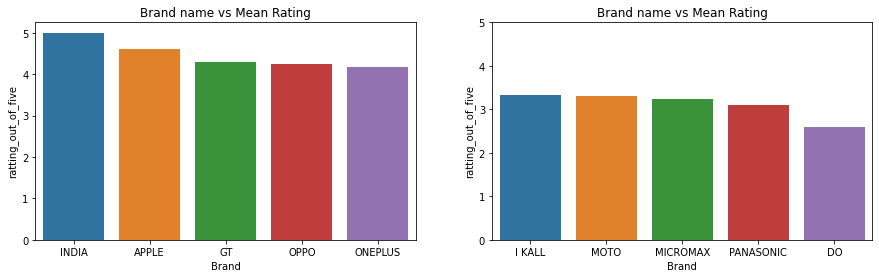

In [26]:
brand_rating=df.groupby("Brand").aggregate({"ratting_out_of_five":"mean"}).sort_values(by="ratting_out_of_five",ascending=False).reset_index()
plt.figure(figsize=(15,4))
plt.ylim(0,5)
plt.subplot(1,2,1)
sns.barplot(data=brand_rating.head(5),x="Brand",y="ratting_out_of_five")
plt.title("Brand name vs Mean Rating")

plt.subplot(1,2,2)
plt.ylim(0,5)
sns.barplot(data=brand_rating.tail(5),x="Brand",y="ratting_out_of_five",)
plt.title("Brand name vs Mean Rating")


***
* The most upvoted Brands are India, Apple and GT Brand
* The least upvoted Brands are Do, Panasonic and Micromax

***

Text(0.5, 1.0, 'Percent total number of ratings on brands')

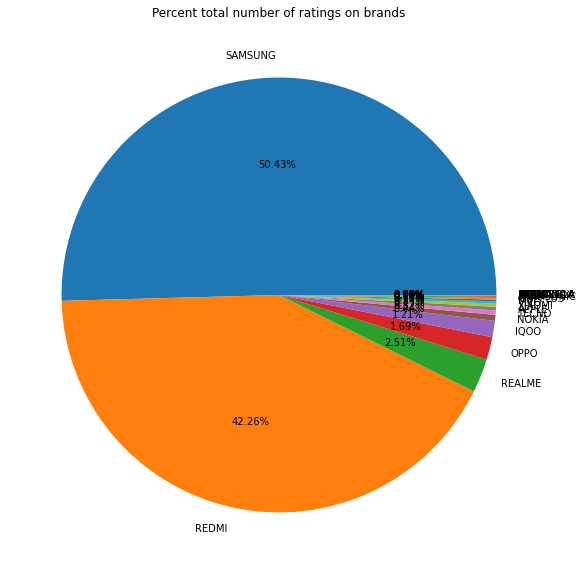

In [27]:
brand_rating=df.groupby("Brand").aggregate({"Rated_people":"sum"}).sort_values(by="Rated_people",ascending=False).reset_index()

plt.figure(figsize=(10,10))
plt.pie(data=brand_rating,labels="Brand",x="Rated_people",autopct="%1.2f%%");
plt.title("Percent total number of ratings on brands")

***
* Samsung and Redmi has the most ratings (almost 93%)
* We can conclude that these brands are more famous or more sold.
***

<AxesSubplot:title={'center':'Brand name vs Total Number of Ratings (Lowest)'}, xlabel='Brand', ylabel='Rated_people'>

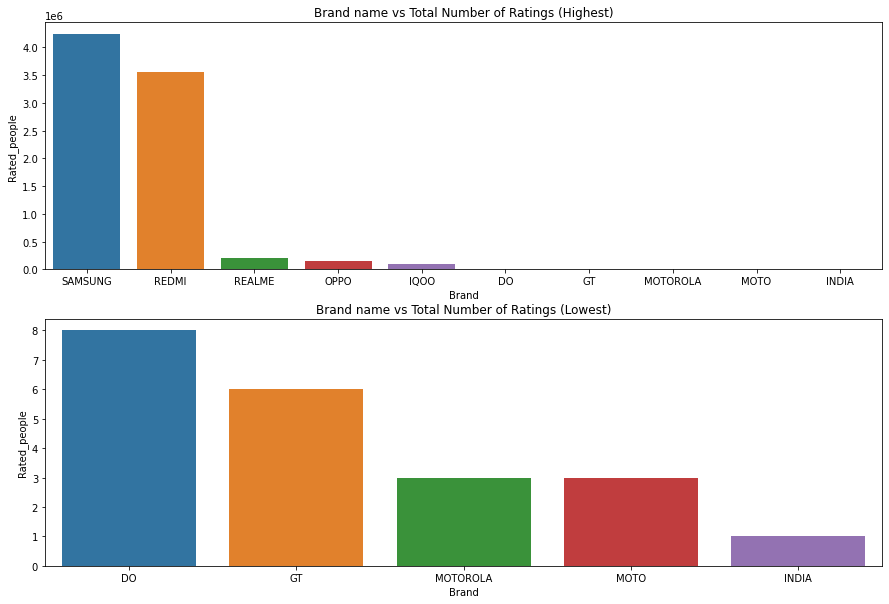

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.title("Brand name vs Total Number of Ratings (Highest)")
highest=brand_rating.head(5)
lowest=brand_rating.tail(5)

sns.barplot(data=pd.concat([highest,lowest]),x="Brand",y="Rated_people")
plt.subplot(2,1,2)
plt.title("Brand name vs Total Number of Ratings (Lowest)")
sns.barplot(data=lowest,x="Brand",y="Rated_people")

***
* There are brands with having number of ratings less than 100.
* It would be better to see real ratings without these less rated Brands.
***

<AxesSubplot:title={'center':'Least 5 ratings'}, xlabel='Brand', ylabel='ratting_out_of_five'>

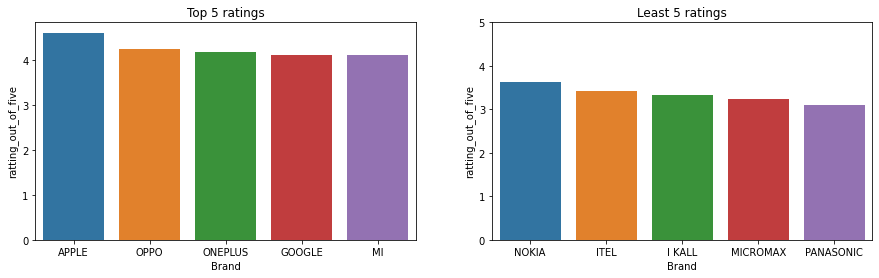

In [29]:
# Get brands with at least 100 ratings

brand_rating=df.groupby("Brand").aggregate({"ratting_out_of_five":"mean","Rated_people":"sum"}).sort_values(by="ratting_out_of_five",ascending=False).reset_index()

more_rated_brands=brand_rating.loc[brand_rating.Rated_people>100,:]

plt.figure(figsize=(15,4))
plt.ylim(0,5)
plt.subplot(1,2,1)
plt.title("Top 5 ratings")
sns.barplot(data=more_rated_brands.head(5),x="Brand",y="ratting_out_of_five")
plt.subplot(1,2,2)
plt.title("Least 5 ratings")
plt.ylim(0,5)
sns.barplot(data=more_rated_brands.tail(5),x="Brand",y="ratting_out_of_five",)

***
* In this new situation Apple, Oppo and Oneplus are the most upvoted.
* Panasonic, Micromaxt and I Kall are least upvoted.
***

### 4.2. Ratings vs Price

<AxesSubplot:>

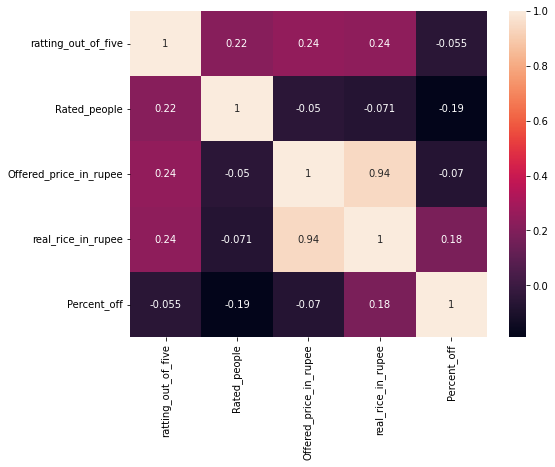

In [30]:
numeric_columns= df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(),annot=True)

***
* There is no strong correlation between price features and rating features
* So rating of any phone does not significantly change the price of a product.
* Maybe companies should decrease the price of a product having low ratings and increase the prices having high ratings to increase profit
***

### 4.3. Brands vs Price and Total Products Offered By Brands

In [31]:
df.head()

,phone_name,Brand,ratting_out_of_five,Rated_people,Offered_price_in_rupee,real_rice_in_rupee,Percent_off
0,"SAMSUNG GALAXY S20 FE 5G (CLOUD NAVY, 8GB RAM,...",SAMSUNG,4.4,17194,39990.0,74999.0,47.0
1,"SAMSUNG GALAXY M32 (LIGHT BLUE, 4GB RAM, 64GB ...",SAMSUNG,4.1,44417,14999.0,16999.0,12.0
2,"REDMI 9A SPORT (CORAL GREEN, 2GB RAM, 32GB STO...",REDMI,4.2,178833,6999.0,8499.0,18.0
4,"REDMI 9A SPORT (CARBON BLACK, 2GB RAM, 32GB ST...",REDMI,4.2,178833,6999.0,7999.0,13.0
5,"JIO NEXT 32 GB ROM, 2 GB RAM, BLUE SMARTPHONE",JIO,3.6,1071,4500.0,7299.0,38.0


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Price')

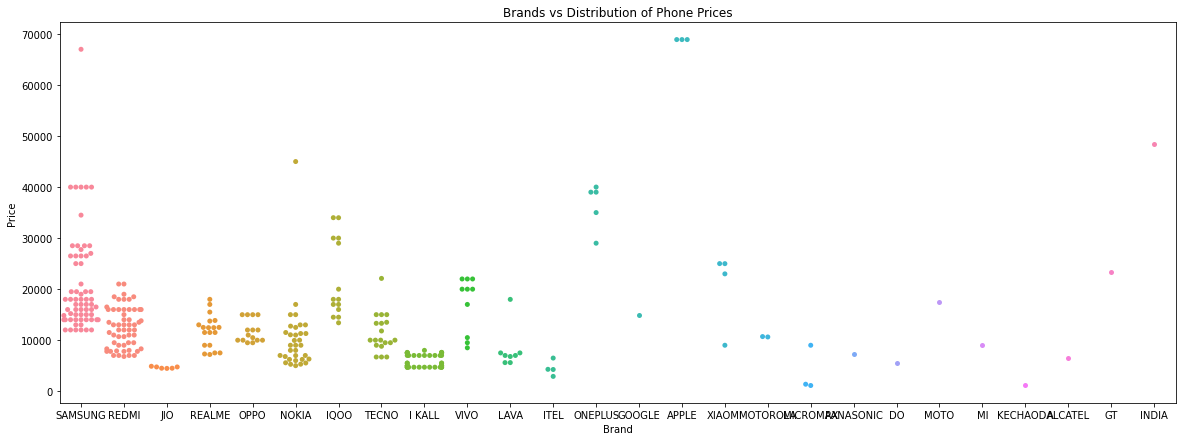

In [32]:
plt.figure(figsize=(20,7))
sns.swarmplot(data=df,x="Brand",y="Offered_price_in_rupee",size=5);
plt.title("Brands vs Distribution of Phone Prices")
plt.ylabel("Price")

***
* Apple products are the most expensive ones.
* Samsung has one expensive product rivaling with Apple products.
* Samsung also offeres mid-class and cheap phones.
* Redmi, Realme, Nokia, Tecno, I Kall offeres low price phones.
* Oneplus and IQOO position itself in the mid-class phones.
* Other brands do not have enough data points to comment.
***

In [33]:
# Count number of phones offered by Brands
occurences_of_brands=pd.DataFrame(df["Brand"].value_counts()).rename(columns={"Brand":"Count"})

# calculate mean prices of phone by brands and discount percents
brand_price=df.groupby("Brand").aggregate({"Offered_price_in_rupee":"mean","Percent_off":"mean"}).sort_values(by="Offered_price_in_rupee",ascending=False)

# merge number of phones with mean prices and discounts
brand_price=brand_price.join(occurences_of_brands,on="Brand").reset_index()

# get brands offering at least 3 phones to the market
brand_price=brand_price.loc[brand_price["Count"]>2,:]

# sort by mean price
brand_price.sort_values(by="Offered_price_in_rupee",ascending=False)

,Brand,Offered_price_in_rupee,Percent_off,Count
0,APPLE,68900.000000,14.000000,3
2,ONEPLUS,36399.000000,10.400000,5
4,IQOO,21812.000000,20.928571,14
5,SAMSUNG,20791.828125,22.812500,64
6,XIAOMI,20494.500000,23.000000,4
8,VIVO,17143.300000,21.800000,10
10,REDMI,12573.321429,21.767857,56
11,OPPO,11756.666667,29.333333,15
12,REALME,11734.947368,12.473684,19
13,TECNO,11362.157895,21.421053,19


Text(0.5, 1.0, 'Top 5 Expensive Products vs Mean Prices ')

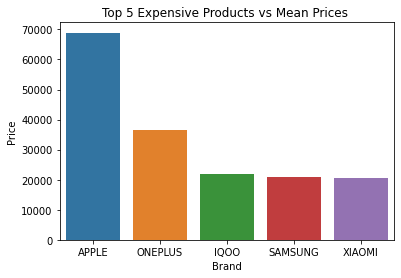

In [34]:
sns.barplot(data=brand_price.head(5),x="Brand",y="Offered_price_in_rupee")
plt.ylabel("Price")
plt.title("Top 5 Expensive Products vs Mean Prices ")

***
* Our previous idead hold true. Apple has the most expensive products
* Oneplus and IQOO offers middle-class products 
***

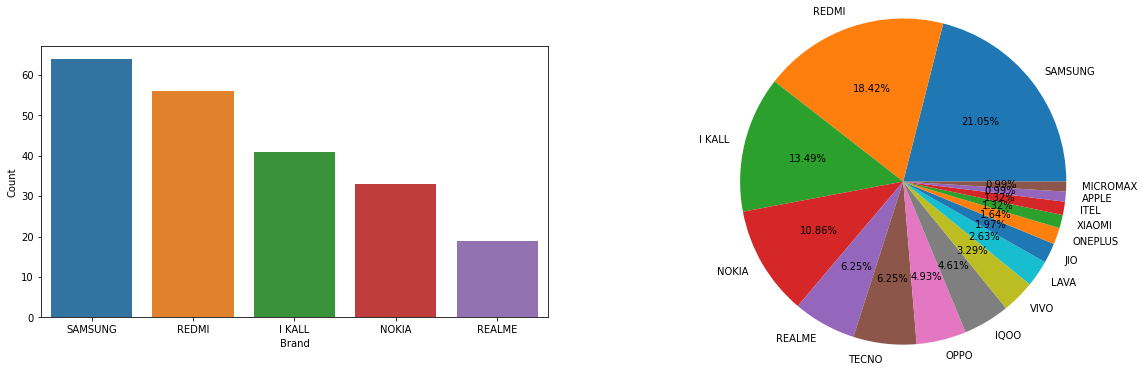

In [35]:
# sort by number of products offered
brand_price=brand_price.sort_values(by="Count",ascending=False)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=brand_price.head(5),x="Brand",y="Count")

plt.subplot(1,2,2)
plt.pie(data=brand_price,x="Count",labels="Brand",autopct="%1.2f%%",radius=1.5);

***
* Samsung, Redmi, I Kall, Nokia and Realme offers more phone variety than other Brands.
* These 5 brands has the majority of market (more than 70%)
***

**Please give comments to help me improving my skills.**

**Further Analysis Topics**
* I will try to learn how to get  features (RAM,processor,GHz etc.) from Brand_Name column. (If you know the way, please advise me)
* Then, I will check the relation between features and price, or features and number of ratings by supervised learning models.
